In [10]:
# imports and config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]


In [11]:
# read in original dataset
original_data_set = pd.read_csv("./DSL-StrongPasswordData.csv")


In [12]:
# create dataframe with differences
def calculate_differences(browser_data_set: pd.DataFrame, original_data_set: pd.DataFrame) -> pd.DataFrame:
    diffs = []
    for i in range(0, len(original_data_set)):
        original_row = original_data_set.iloc[i]
        browser_row = browser_data_set.iloc[i]

        diffs_row = {
            "subject": original_row['subject'],
            "sessionIndex": original_row['sessionIndex'],
            "rep": original_row['rep'],
            "H.period": abs(original_row['H.period'] - browser_row['H.period']),
            "DD.period.t": abs(original_row['DD.period.t'] - browser_row['DD.period.t']),
            "UD.period.t": abs(original_row['UD.period.t'] - browser_row['UD.period.t']),
            "H.t": abs(original_row['H.t'] - browser_row['H.t']),
            "DD.t.i": abs(original_row['DD.t.i'] - browser_row['DD.t.i']),
            "UD.t.i": abs(original_row['UD.t.i'] - browser_row['UD.t.i']),
            "H.i": abs(original_row['H.i'] - browser_row['H.i']),
            "DD.i.e": abs(original_row['DD.i.e'] - browser_row['DD.i.e']),
            "UD.i.e": abs(original_row['UD.i.e'] - browser_row['UD.i.e']),
            "H.e": abs(original_row['H.e'] - browser_row['H.e']),
            "DD.e.five": abs(original_row['DD.e.five'] - browser_row['DD.e.five']),
            "UD.e.five": abs(original_row['UD.e.five'] - browser_row['UD.e.five']),
            "H.five": abs(original_row['H.five'] - browser_row['H.five']),
            "DD.five.Shift.r": abs(original_row['DD.five.Shift.r'] - browser_row['DD.five.Shift.r']),
            "UD.five.Shift.r": abs(original_row['UD.five.Shift.r'] - browser_row['UD.five.Shift.r']),
            "H.Shift.r": abs(original_row['H.Shift.r'] - browser_row['H.Shift.r']),
            "DD.Shift.r.o": abs(original_row['DD.Shift.r.o'] - browser_row['DD.Shift.r.o']),
            "UD.Shift.r.o": abs(original_row['UD.Shift.r.o'] - browser_row['UD.Shift.r.o']),
            "H.o": abs(original_row['H.o'] - browser_row['H.o']),
            "DD.o.a": abs(original_row['DD.o.a'] - browser_row['DD.o.a']),
            "UD.o.a": abs(original_row['UD.o.a'] - browser_row['UD.o.a']),
            "H.a": abs(original_row['H.a'] - browser_row['H.a']),
            "DD.a.n": abs(original_row['DD.a.n'] - browser_row['DD.a.n']),
            "UD.a.n": abs(original_row['UD.a.n'] - browser_row['UD.a.n']),
            "H.n": abs(original_row['H.n'] - browser_row['H.n']),
            "DD.n.l": abs(original_row['DD.n.l'] - browser_row['DD.n.l']),
            "UD.n.l": abs(original_row['UD.n.l'] - browser_row['UD.n.l']),
            "H.l": abs(original_row['H.l'] - browser_row['H.l']),
            "DD.l.Return": abs(original_row['DD.l.Return'] - browser_row['DD.l.Return']),
            "UD.l.Return": abs(original_row['UD.l.Return'] - browser_row['UD.l.Return']),
            "H.Return": abs(original_row['H.Return'] - browser_row['H.Return'])
        }

        diffs.append(diffs_row)

    return pd.DataFrame(diffs)

# visualize differences


def visualize(diffs: pd.DataFrame, browser: str, isolated: str, out):
    colums = diffs.columns.to_list()
    ax = diffs[colums[3:]].plot(
        kind='box', title='boxplot', showmeans=True, showfliers=False)

    ax.tick_params(axis='x', labelsize=14)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.tight_layout()
    plt.title(
        f"Absolute difference between Orginial Data and Simulated Data ({browser} {isolated})", fontsize=18)
    plt.ylabel("Difference in sec", fontsize=18)
    plt.xlabel("Datapoints", fontsize=18)
    plt.tight_layout()
    plt.savefig(out, bbox_inches="tight", pad_inches=0.3,)
    plt.show()


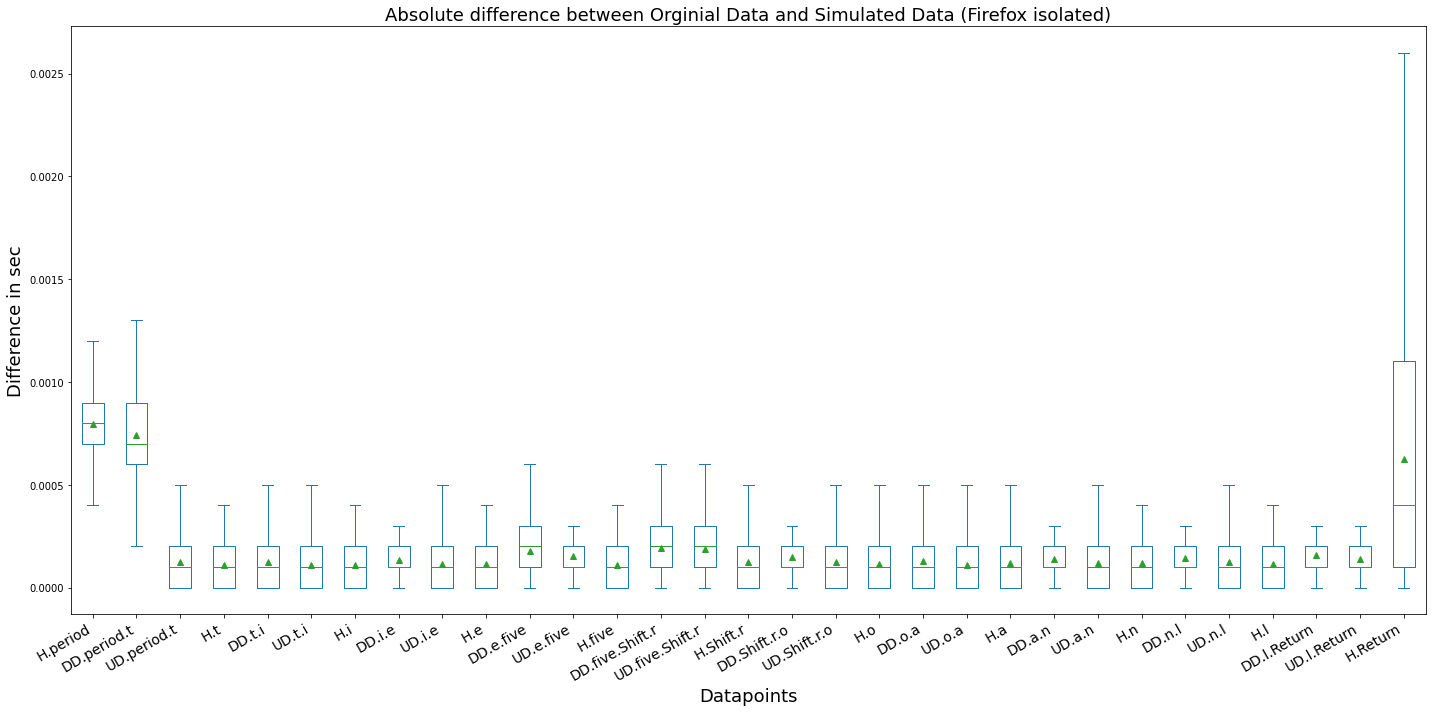

In [13]:
# Firefox isolated
browser_data_set = pd.read_csv(
    "./firefox/password_data_firefox_isolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
visualize(diffs, browser="Firefox", isolated="isolated", out="./firefox/password_data_firefox_isolated/fig.jpeg")


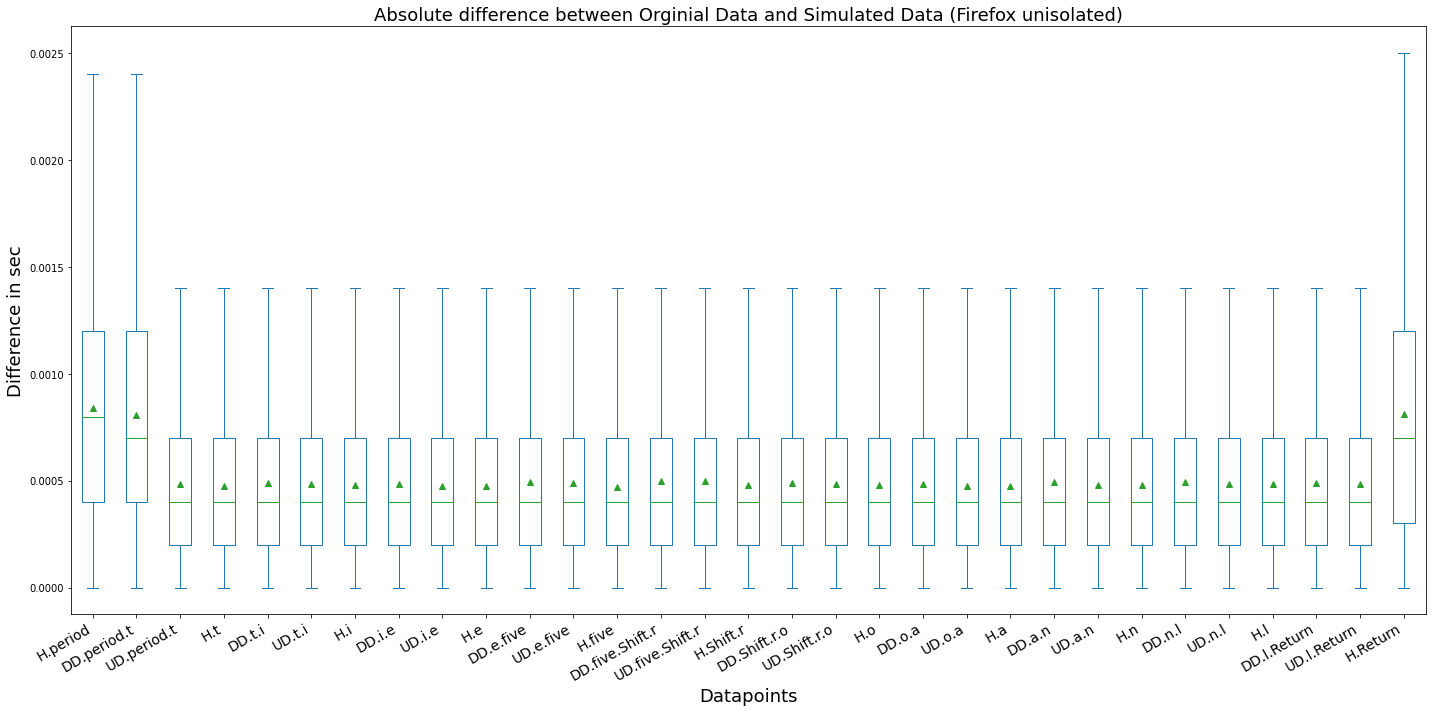

In [14]:
# Firefox unisolated
browser_data_set = pd.read_csv(
    "./firefox/password_data_firefox_unisolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
visualize(diffs, browser="Firefox", isolated="unisolated", out="./firefox/password_data_firefox_unisolated/fig.jpeg")


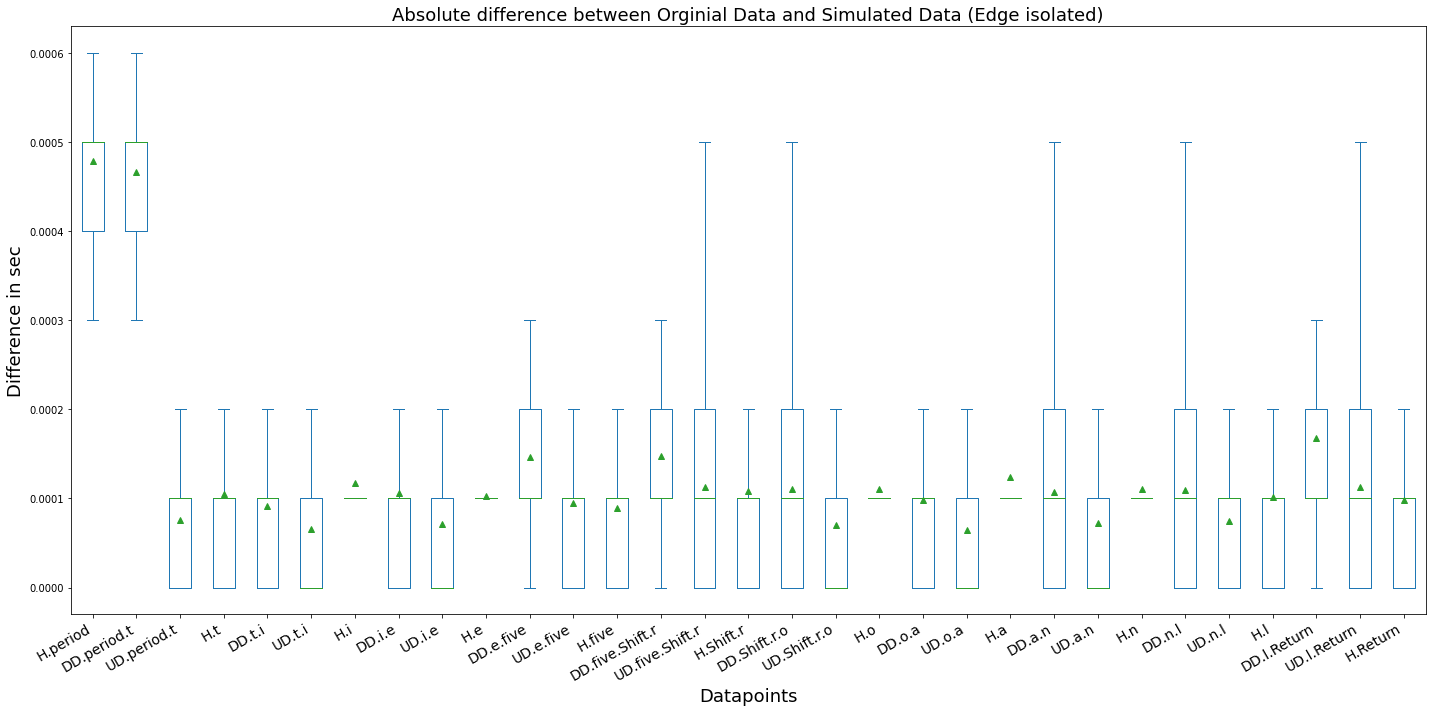

In [15]:
# Edge isolated
browser_data_set = pd.read_csv(
    "./edge/password_data_edge_isolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
visualize(diffs, browser="Edge", isolated="isolated",out="./edge/password_data_edge_isolated/fig.jpeg")


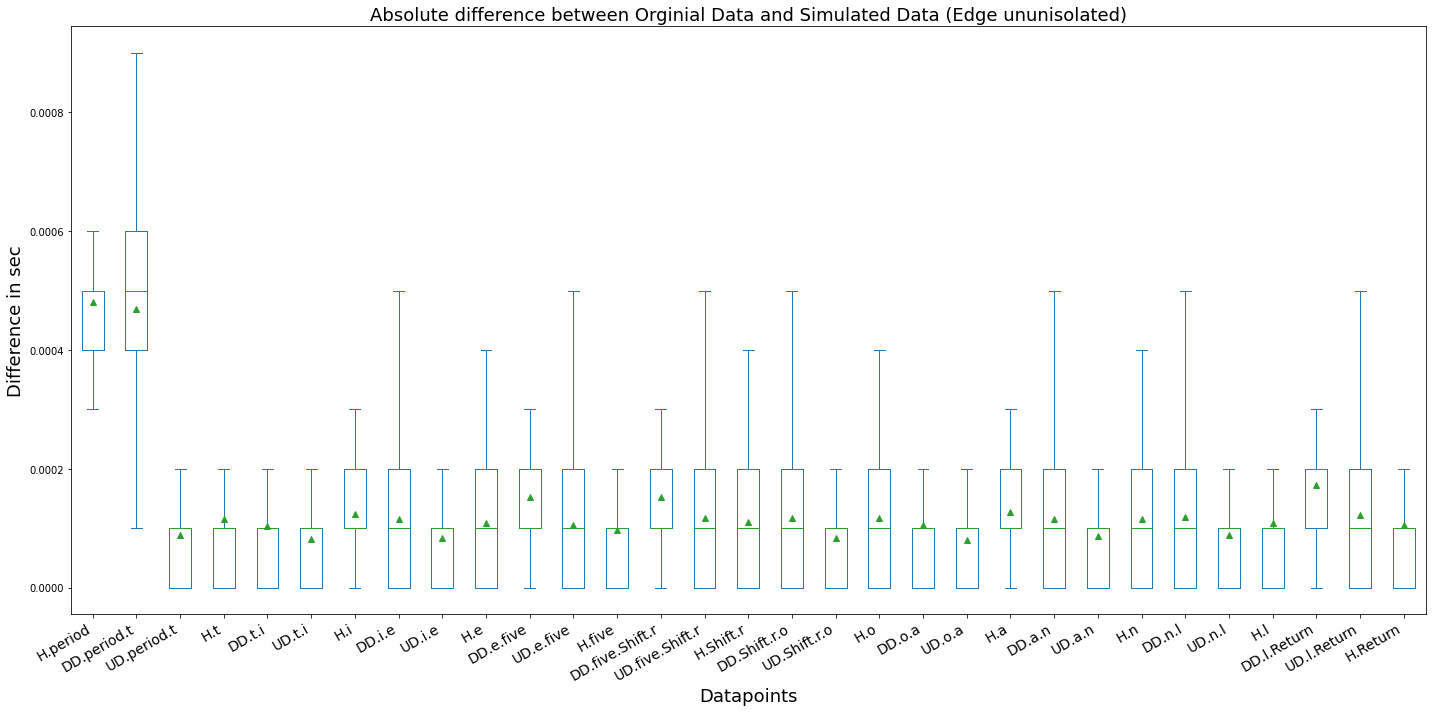

In [16]:
# Edge unisolated
browser_data_set = pd.read_csv(
    "./edge/password_data_edge_unisolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
visualize(diffs, browser="Edge", isolated="ununisolated",out="./edge/password_data_edge_unisolated/fig.jpeg")


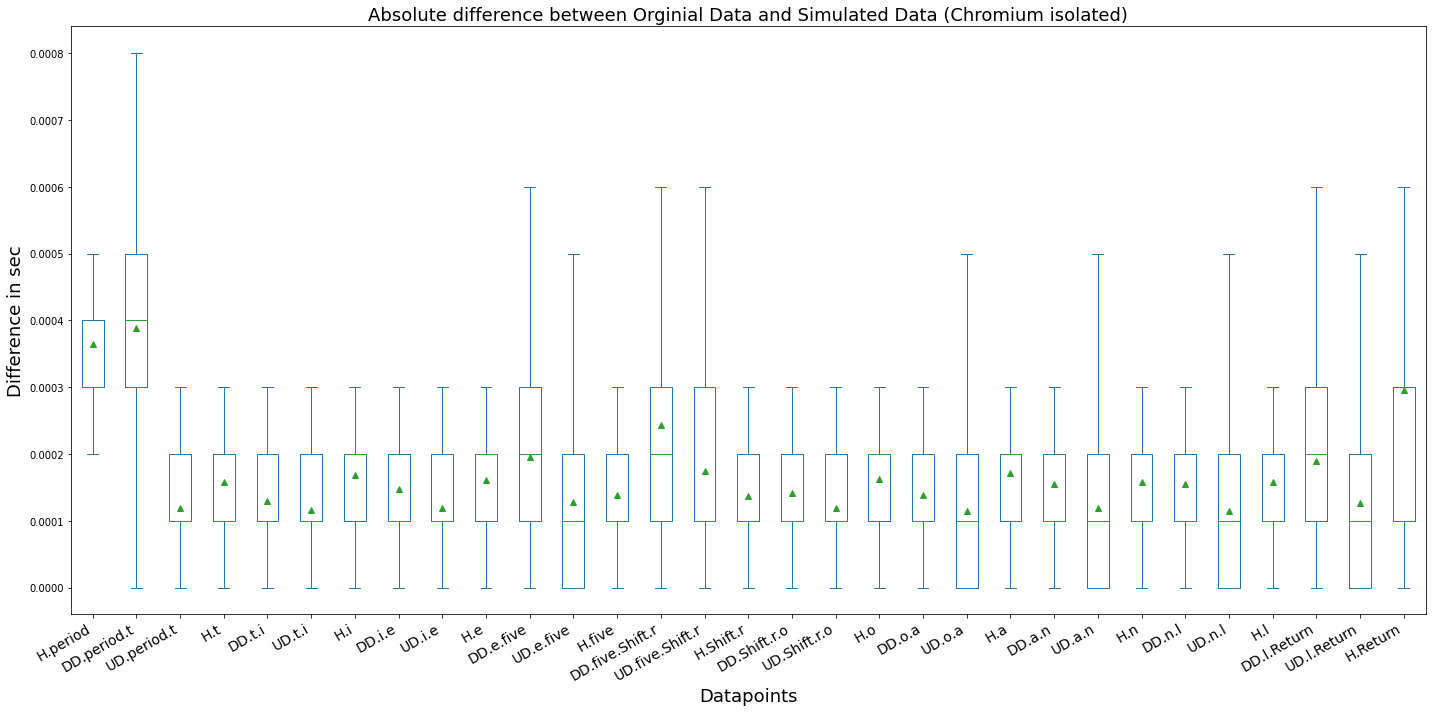

In [17]:
# Chromium isolated
browser_data_set = pd.read_csv(
    "./chromium/password_data_chromium_isolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
visualize(diffs, browser="Chromium", isolated="isolated", out="./chromium/password_data_chromium_isolated/fig.jpeg")

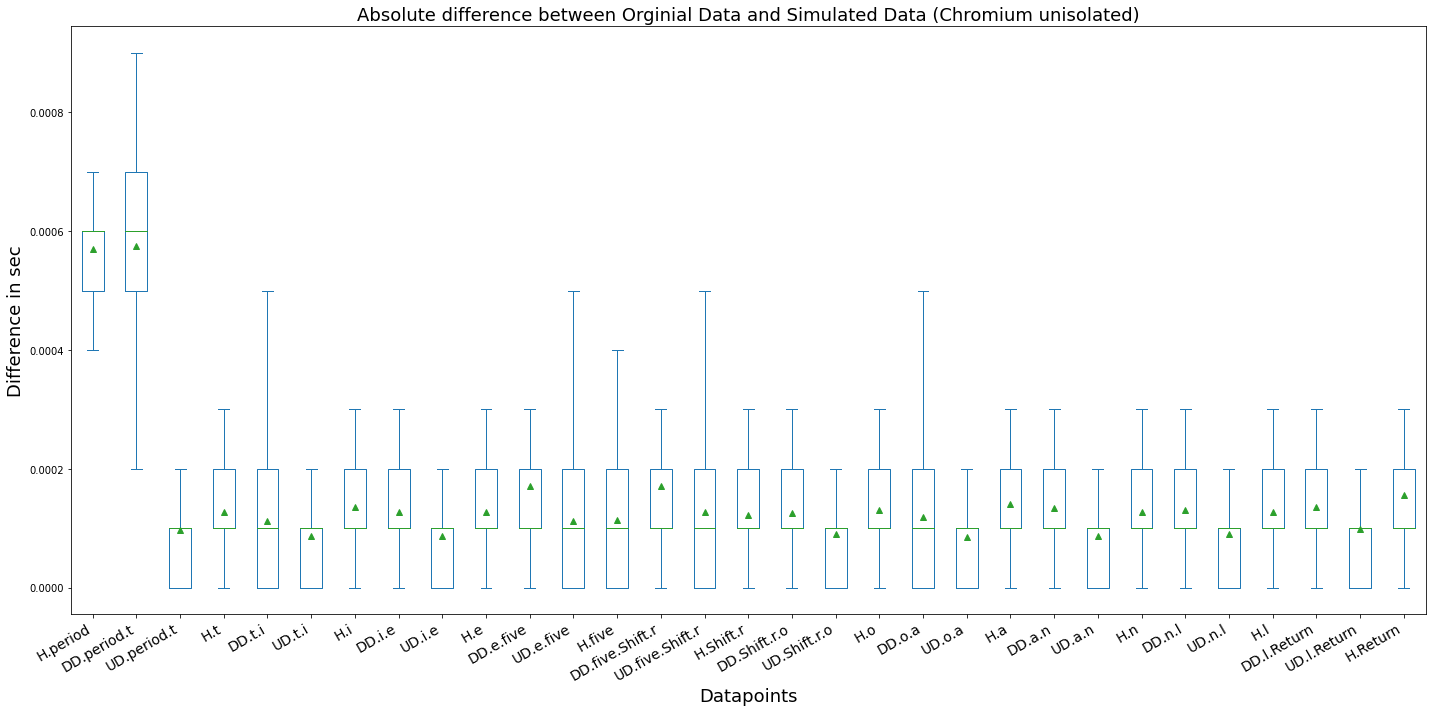

In [18]:
# Chromium unisolated
browser_data_set = pd.read_csv(
    "./chromium/password_data_chromium_unisolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
visualize(diffs, browser="Chromium", isolated="unisolated", out="./chromium/password_data_chromium_unisolated/fig.jpeg")


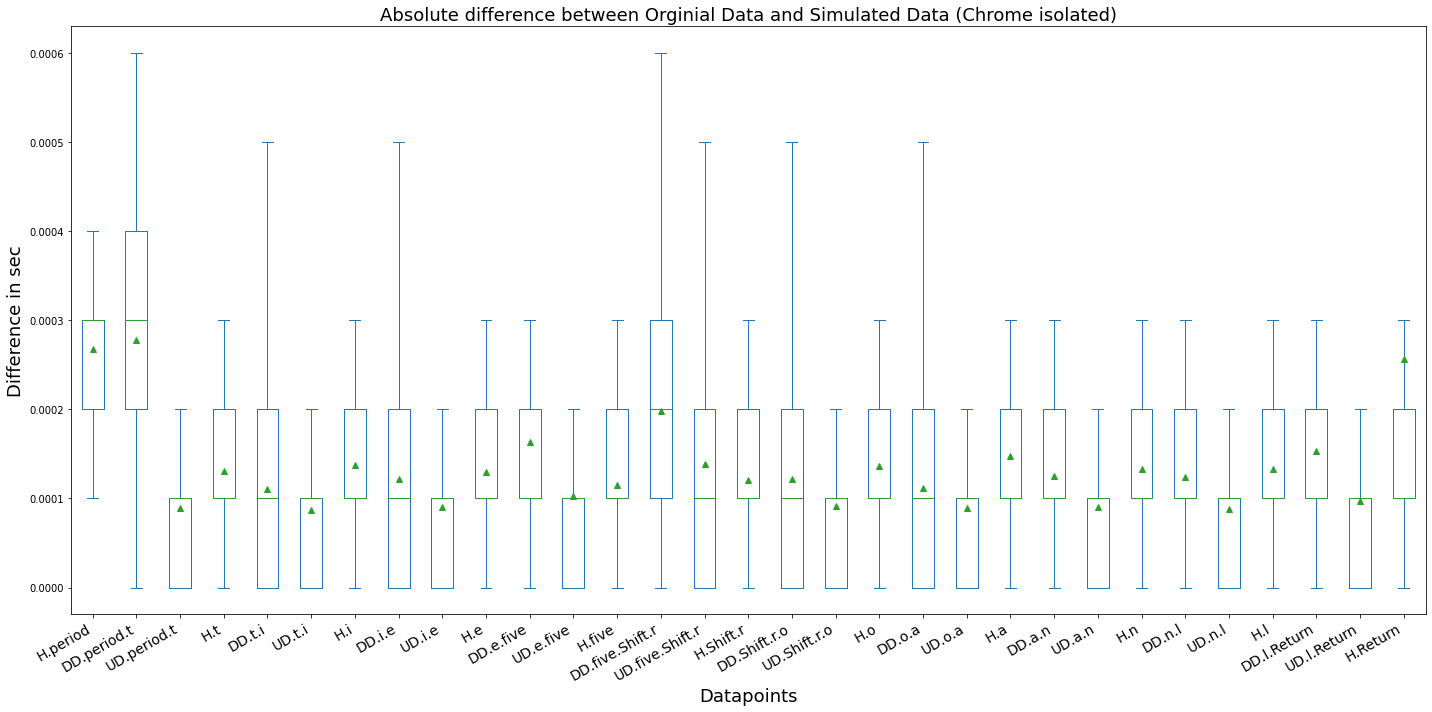

In [19]:
# Chrome isolated
browser_data_set = pd.read_csv(
    "./chrome/password_data_chrome_isolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
visualize(diffs, browser="Chrome", isolated="isolated", out="./chrome/password_data_chrome_isolated/fig.jpeg")


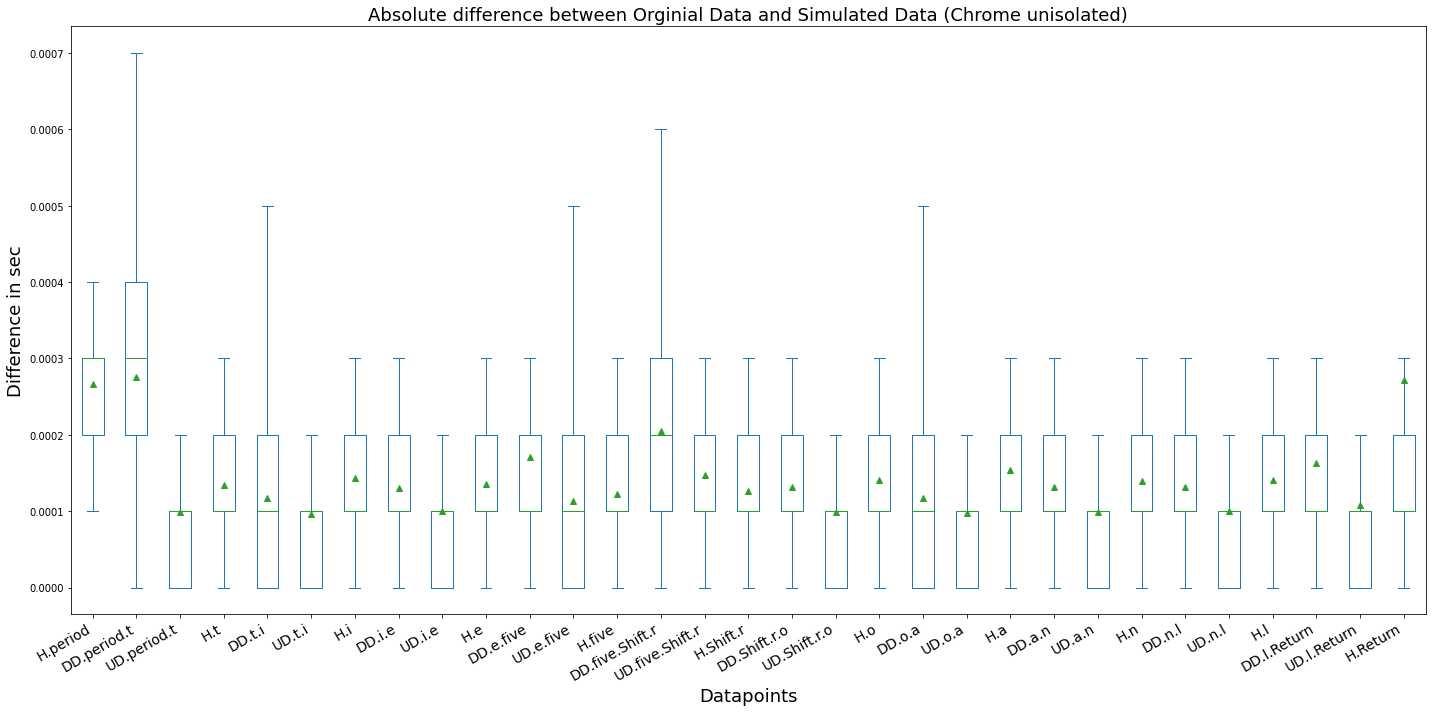

In [20]:
# Chrome unisolated
browser_data_set = pd.read_csv(
    "./chrome/password_data_chrome_unisolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
visualize(diffs, browser="Chrome", isolated="unisolated", out="./chrome/password_data_chrome_unisolated/fig.jpeg")


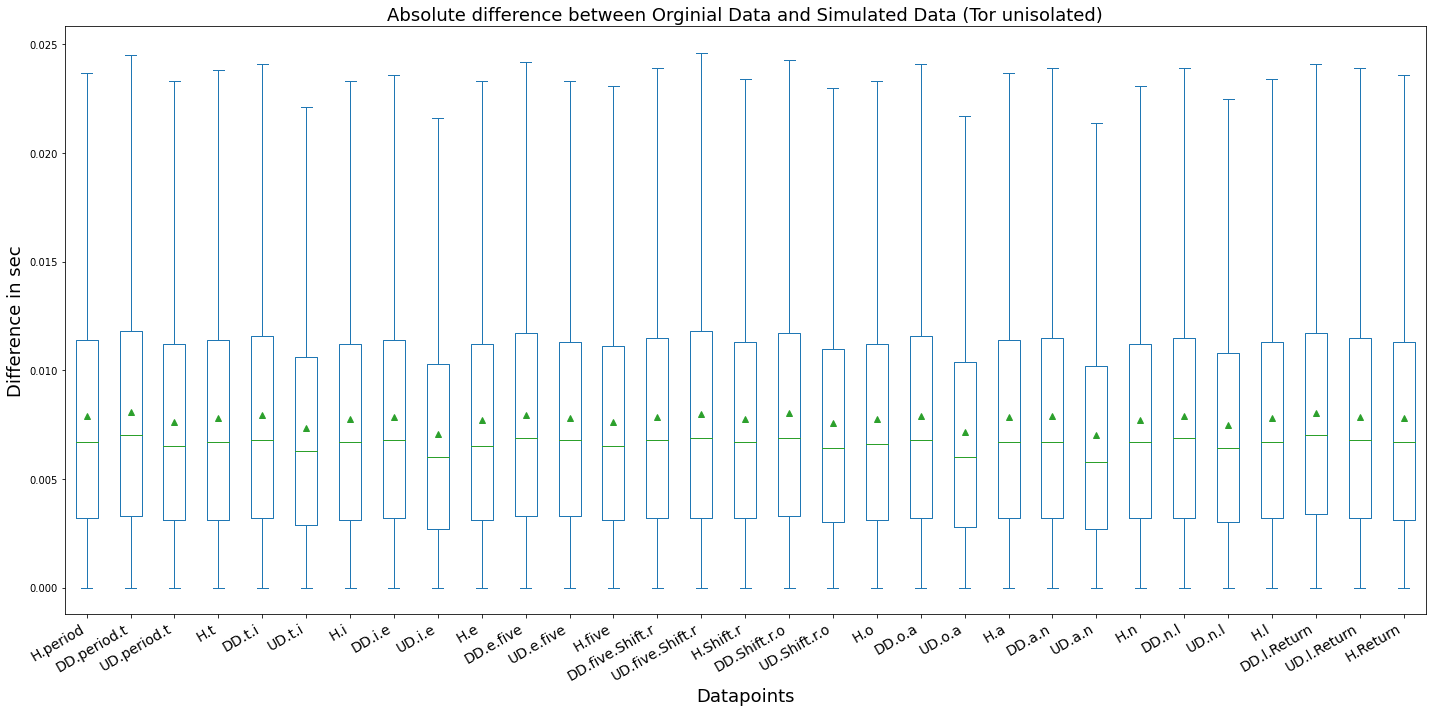

In [21]:
# Tor unisolated
browser_data_set = pd.read_csv(
    "./tor/password_data_tor_unisolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
visualize(diffs, browser="Tor", isolated="unisolated", out="./tor/password_data_tor_unisolated/fig.jpeg")


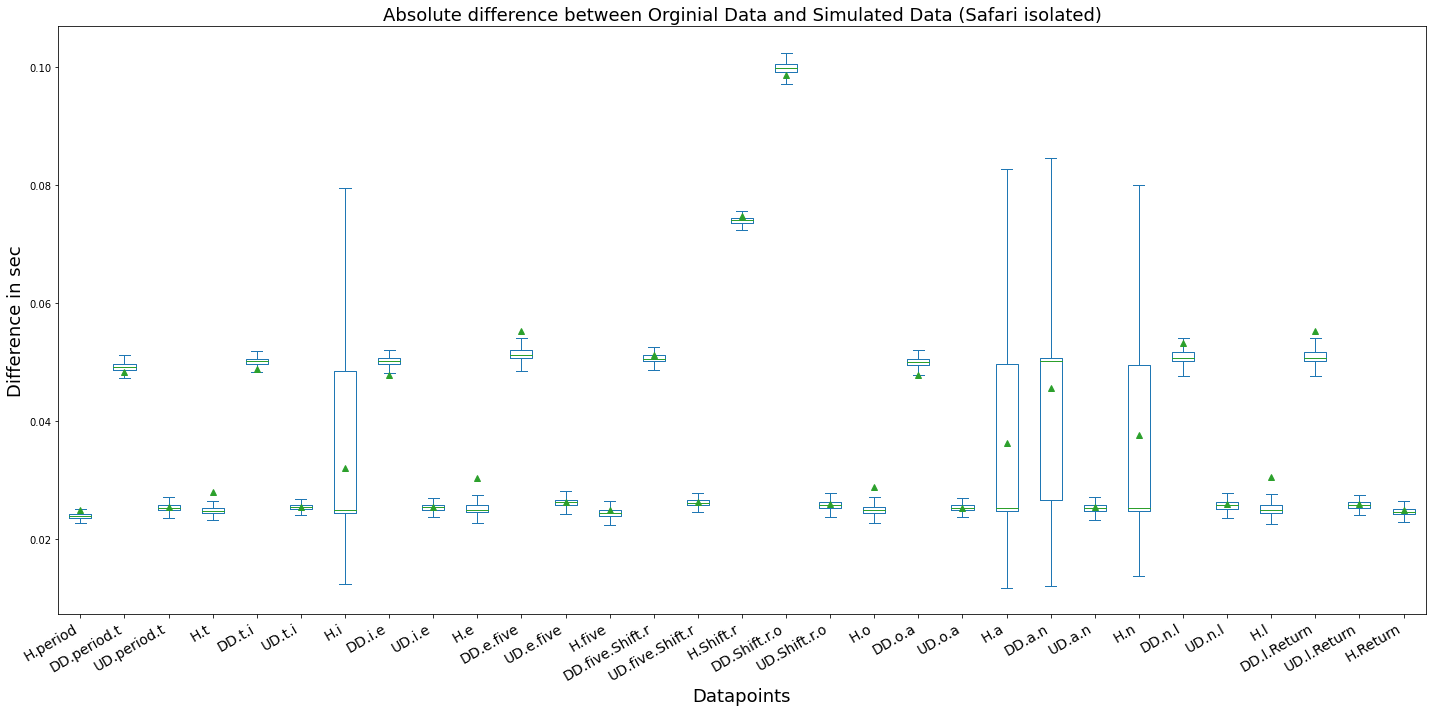

In [22]:
# Safari isolated
browser_data_set = pd.read_csv(
    "./safari/password_data_safari_isolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
visualize(diffs, browser="Safari", isolated="isolated", out="./safari/password_data_safari_isolated/fig.jpeg")


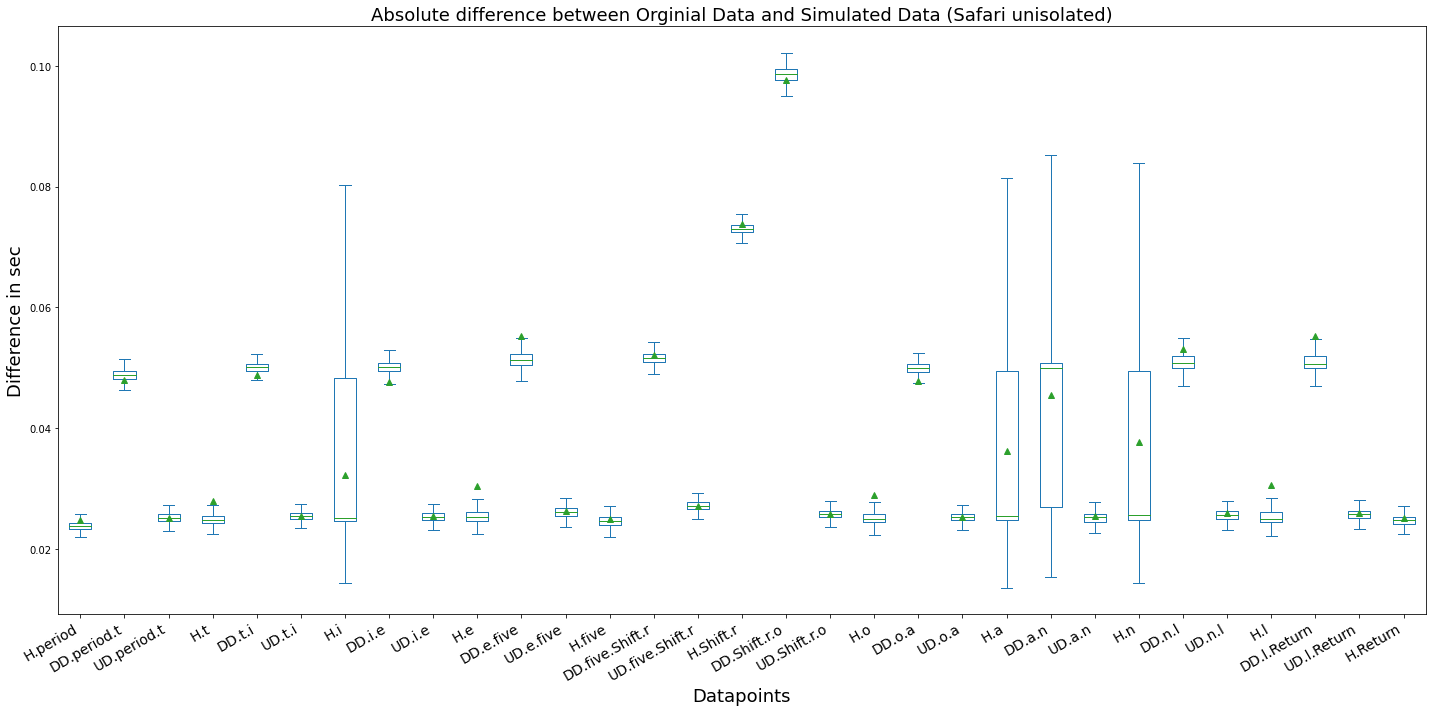

In [23]:
# Safari unisolated
browser_data_set = pd.read_csv(
    "./safari/password_data_safari_unisolated/full_data_set.csv")

diffs = calculate_differences(browser_data_set, original_data_set)
visualize(diffs, browser="Safari", isolated="unisolated", out="./safari/password_data_safari_unisolated/fig.jpeg")

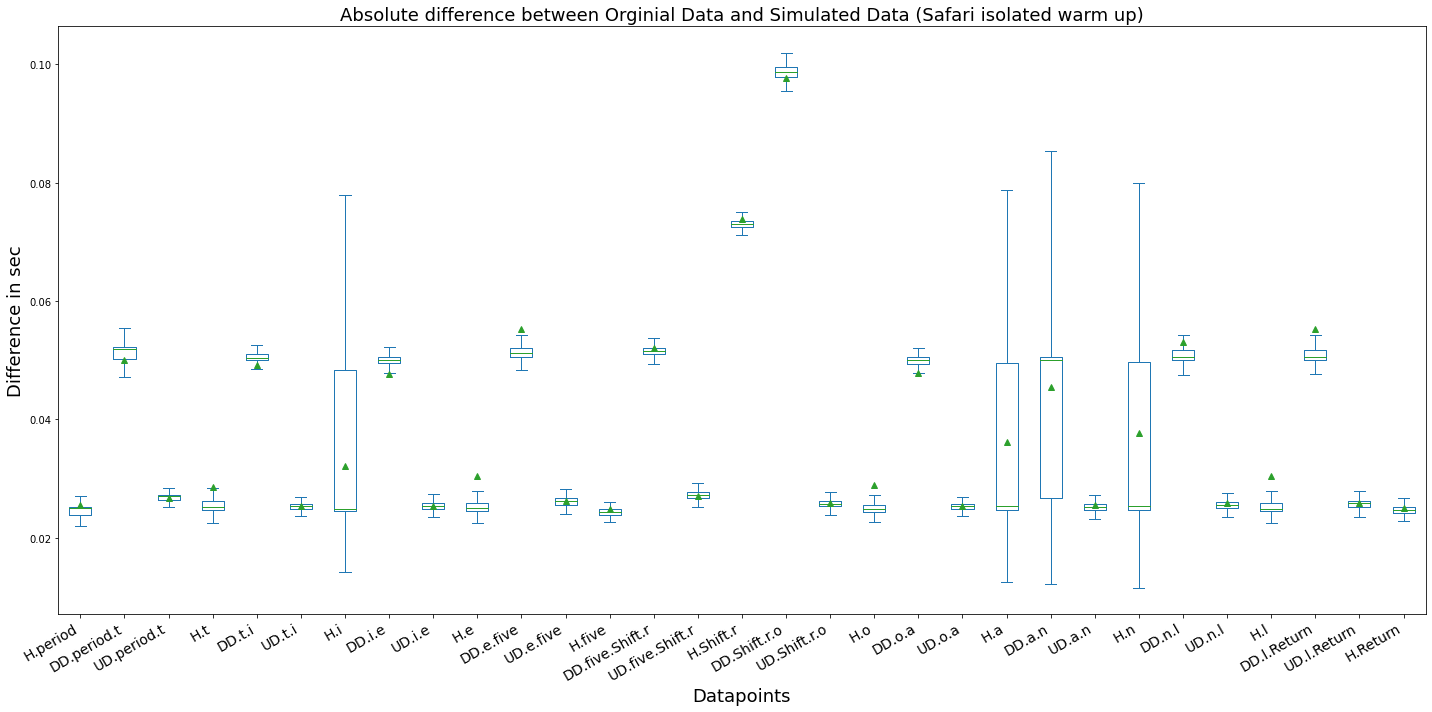

In [24]:
# Safari isolated warm up
safari_isolated_warmup = pd.read_csv('./safari/password_data_safari_isolated_warm_up/full_data_set.csv')

diffs = calculate_differences(safari_isolated_warmup, original_data_set)
visualize(diffs, browser="Safari", isolated="isolated warm up", out="./safari/password_data_safari_isolated_warm_up/fig.jpeg")

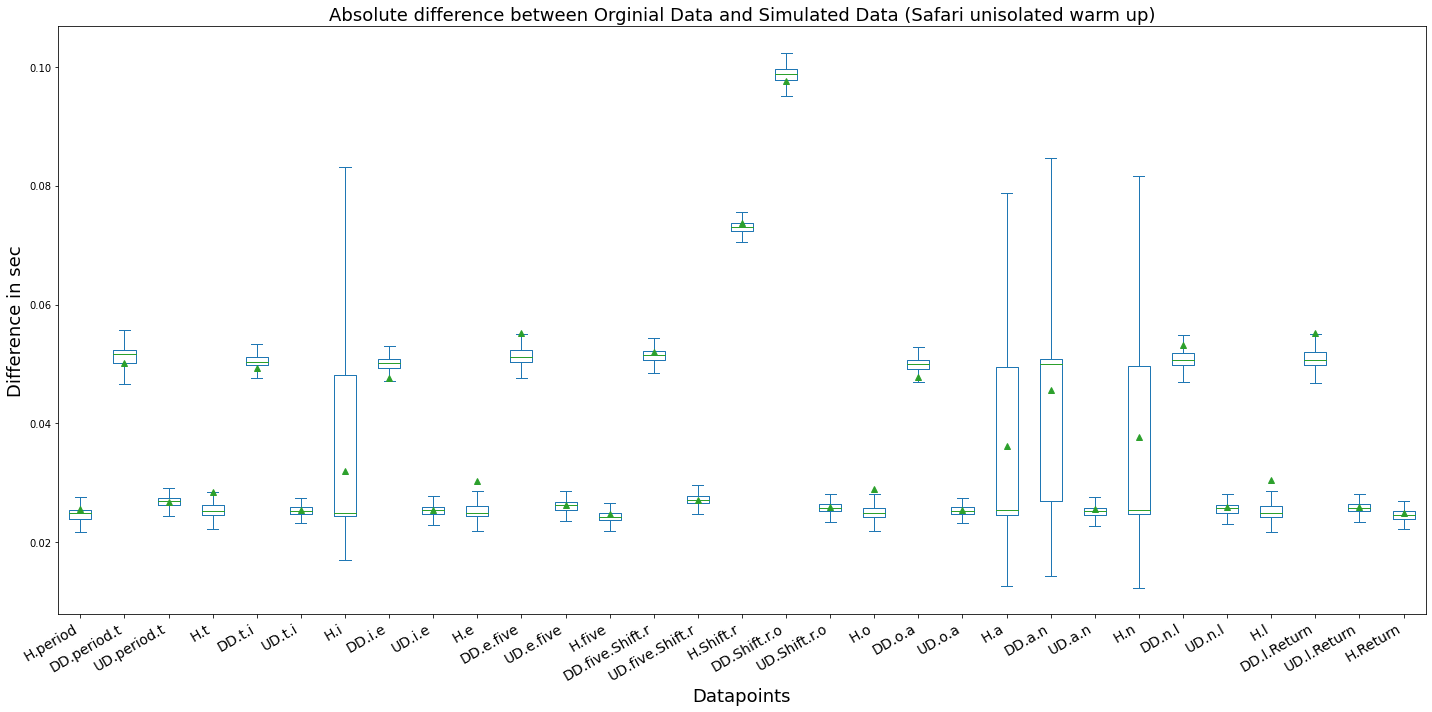

In [25]:
# Safari unisolated warm up
safari_unisolated_warmup = pd.read_csv('./safari/password_data_safari_unisolated_warm_up/full_data_set.csv')

diffs = calculate_differences(safari_unisolated_warmup, original_data_set)
visualize(diffs, browser="Safari", isolated="unisolated warm up", out="./safari/password_data_safari_unisolated_warm_up/fig.jpeg")

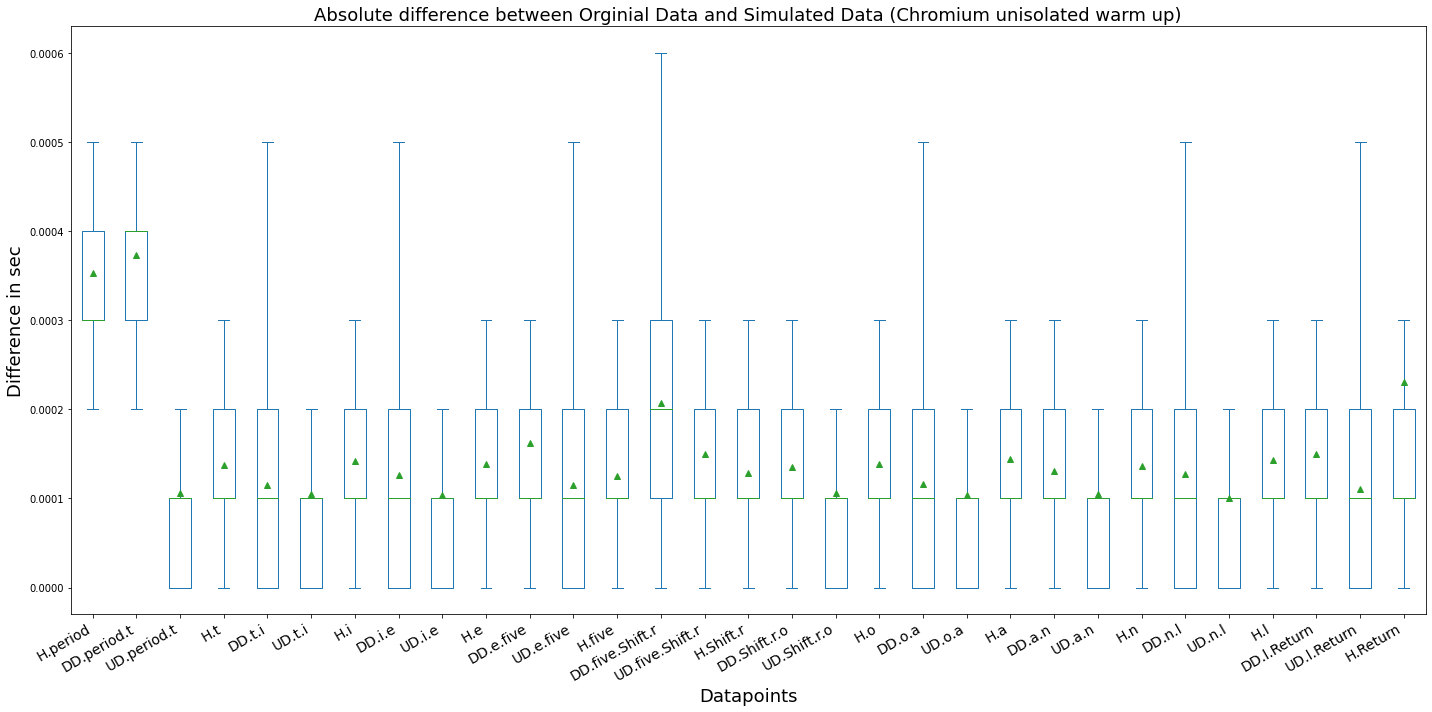

In [26]:
# Chromium isolated warm up
chromium_unisolated_warmup = pd.read_csv('./chromium/password_data_chromium_unisolated_warmup/full_data_set.csv')

diffs = calculate_differences(chromium_unisolated_warmup, original_data_set)
visualize(diffs, browser="Chromium", isolated="unisolated warm up", out="./chromium/password_data_chromium_unisolated_warmup/fig.jpeg")

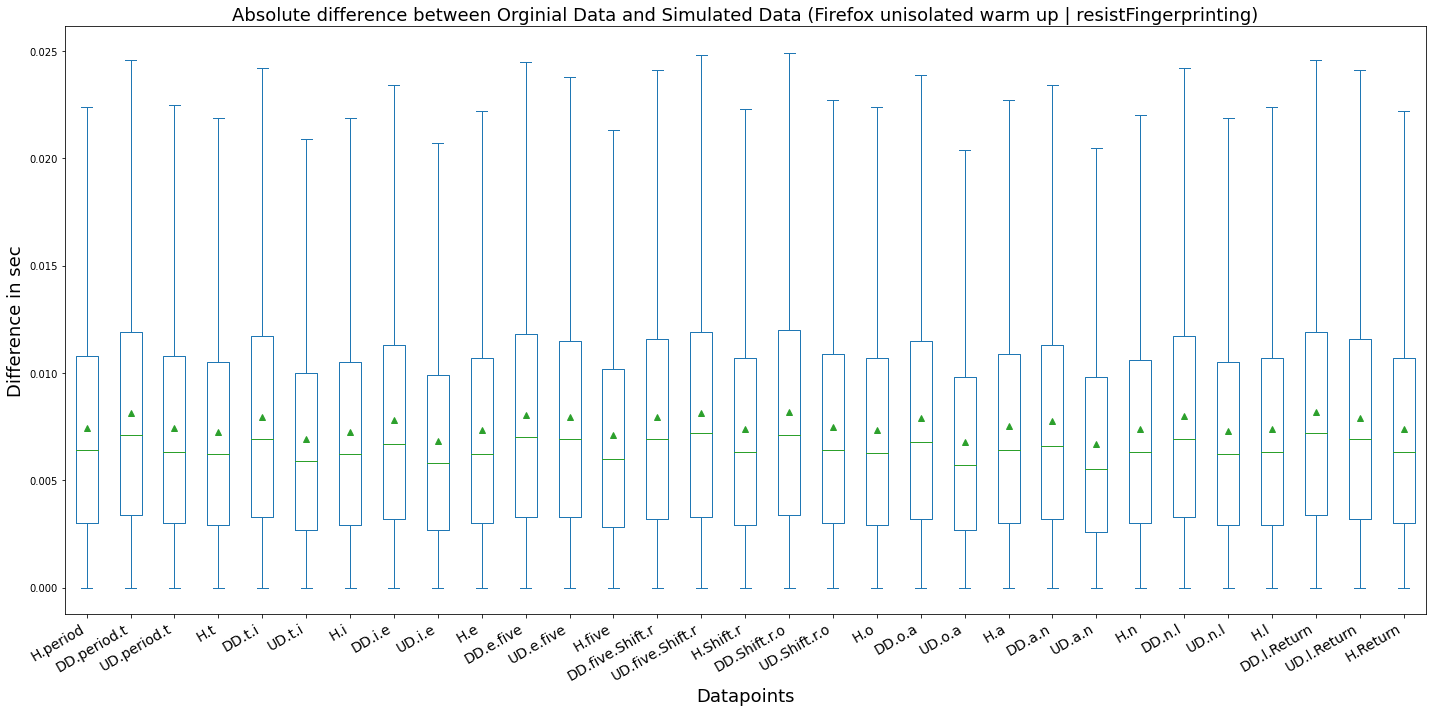

In [27]:
# Firefox unisolated warm up and resistFingerprinting
firefox_unisolated_warmup_resist = pd.read_csv('./firefox_resistFingerprinting/firefox_unisolated_resistFingerprinting_true/full_data_set.csv')

diffs = calculate_differences(firefox_unisolated_warmup_resist, original_data_set)
visualize(diffs, browser="Firefox", isolated="unisolated warm up | resistFingerprinting", out="./firefox_resistFingerprinting/firefox_unisolated_resistFingerprinting_true/fig.jpeg")

